<a href="https://colab.research.google.com/github/yeiscop/PYTHON/blob/master/Coding_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu'),
     Dense(16, activation='relu'),
     Dense(10, activation='softmax')
])

In [4]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
# Build the Sequential convolutional neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
     Dense(16, activation='relu', name='La_Primera'),
     Dense(16, activation='relu'),
     Dense(10, activation='softmax')
])

In [7]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
La_Primera (Dense)           (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Build the Sequential convolutional neural network model
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [25]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae=tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=[acc,mae])

In [ ]:
# Print the resulting model attributes



***
<a id="coding_tutorial_4"></a>
## The fit method

In [9]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [10]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [26]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [28]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [29]:
# Rescale the image values so that they lie in between 0 and 1.

train_images=train_images/255
test_images=test_images/255

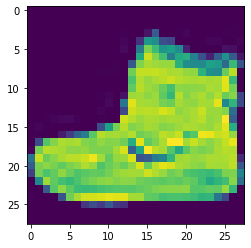

label: Ankle boot


In [32]:
# Display one of the images
i=0

img=train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}" )

#### Fit the model

In [36]:
# Fit the model
history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256, verbose=1)

Epoch 1/8
235/235 [==============================] - 13s 54ms/step - loss: 0.2927 - sparse_categorical_accuracy: 0.8936 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 [==============================] - 13s 54ms/step - loss: 0.2813 - sparse_categorical_accuracy: 0.8992 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 [==============================] - 13s 54ms/step - loss: 0.2739 - sparse_categorical_accuracy: 0.9017 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 [==============================] - 13s 54ms/step - loss: 0.2711 - sparse_categorical_accuracy: 0.9025 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 [==============================] - 13s 54ms/step - loss: 0.2677 - sparse_categorical_accuracy: 0.9041 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 [==============================] - 13s 54ms/step - loss: 0.2625 - sparse_categorical_accuracy: 0.9043 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 [==============================] - 17s 72ms/step - loss: 0.2576 - sparse_categoric

#### Plot training history

In [37]:
# Load the history into a pandas Dataframe
df=pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.292746,0.893650,4.420002
1,0.281279,0.899167,4.420002
2,0.273934,0.901667,4.420001
3,0.271112,0.902450,4.420000
4,0.267677,0.904100,4.420002


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'Epoch')]

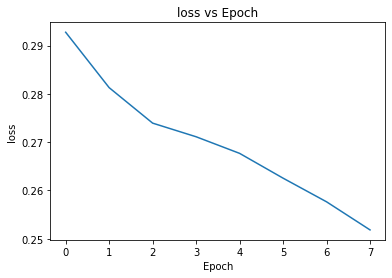

In [41]:
# Make a plot for the loss
loss_plot=df.plot(y='loss', title = 'loss vs Epoch', legend=False)
loss_plot.set(xlabel='Epoch', ylabel='loss')

In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model



#### Make predictions from the model

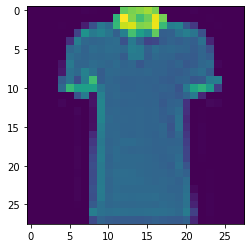

Label: T-shirt/top


In [13]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

